<h3 style = 'color:green' >Using this data ,Build a regression model and Predict the per capita income fo canadian citizens in year 2020</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
canada = pd.read_csv("canada_per_capita_income.csv")
canada.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


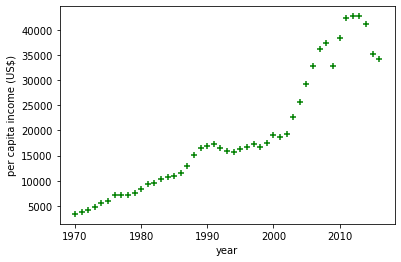

In [3]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('per capita income (US$)')
plt.scatter(canada[['year']],canada[['per capita income (US$)']],c = 'green',marker = '+')
plt.show()

In [4]:
reg = linear_model.LinearRegression()

In [5]:
reg.fit(canada[['year']],canada[['per capita income (US$)']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
reg.coef_

array([[828.46507522]])

In [7]:
reg.intercept_

array([-1632210.75785546])

In [8]:
reg.predict([[2020]])

array([[41288.69409442]])

In [9]:
yea = {'year':[2013,2021,2020,2022,2023,2026,2027]}
years = pd.DataFrame(yea)
print(years)

   year
0  2013
1  2021
2  2020
3  2022
4  2023
5  2026
6  2027


In [10]:
f = reg.predict(years)

In [11]:
years['per capita income (US$)']= f

In [12]:
years

,year,per capita income (US$)
0,2013,35489.438568
1,2021,42117.159170
2,2020,41288.694094
3,2022,42945.624245
4,2023,43774.089320
5,2026,46259.484546
6,2027,47087.949621


In [13]:
years.to_csv('prediction_price.csv')

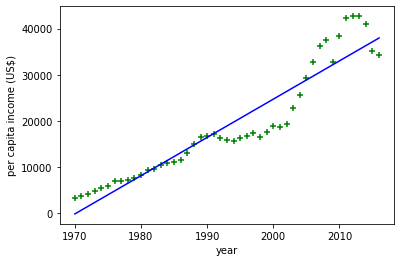

In [14]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('per capita income (US$)')
plt.scatter(canada[['year']],canada[['per capita income (US$)']],c = 'green',marker = '+')
plt.plot(canada[['year']],reg.predict(canada[['year']]),c = 'blue')

plt.show()

In [15]:
df2 = pd.concat([canada,years],ignore_index = True) # or sort = True
df2.tail(5)

,year,per capita income (US$)
49,2020,41288.694094
50,2022,42945.624245
51,2023,43774.089320
52,2026,46259.484546
53,2027,47087.949621


## Save the model

In [16]:
!pip install joblib
from sklearn.externals import joblib

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [17]:
joblib.dump(reg,'my_model_lib')

['my_model_lib']

## Load Model

In [18]:
# from sklearn.externals import joblib
# mj = joblib.load('my_model_lib')
# mj.predict([[2020]])